# CNN - Data Augmentation - Batch Normalization

In [0]:
!pip install -q tensorflow-gpu==2.0.0

In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(tf.__version__, tf.test.gpu_device_name())
device_lib.list_local_devices()

2.0.0 /device:GPU:0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9881274549349126339, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5796091946933593265
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4413001423921358756
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11330115994
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10477629833321377581
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Load the data

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

## Play with the data

In [5]:
print('Train data: ', x_train.shape, y_train.shape)
print('Test data: ', x_test.shape, y_test.shape)

Train data:  (50000, 32, 32, 3) (50000, 1)
Test data:  (10000, 32, 32, 3) (10000, 1)


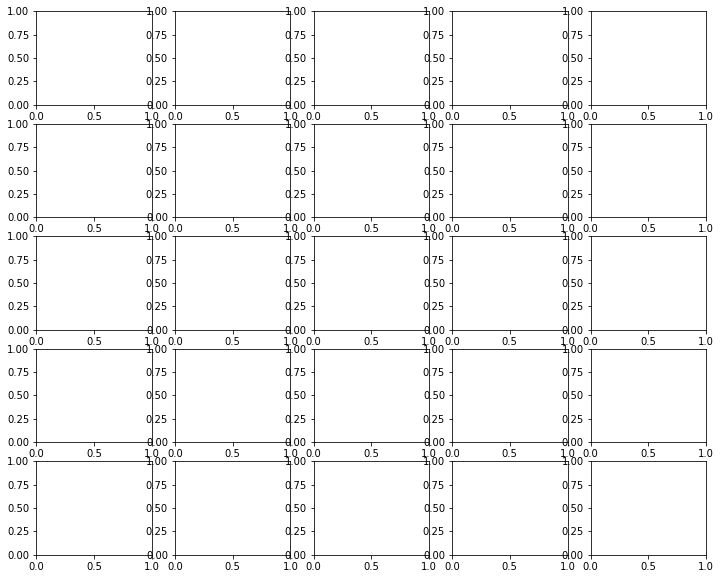

In [6]:
fig1, ax1 = plt.subplots(nrows=5, ncols=5, figsize=(12, 10));

In [0]:
for i in range(5):
		for j in range(5):
			ax1[i, j].axis('off')
			ax1[i, j].grid(False)
			ax1[i, j].set_xticks([])
			ax1[i, j].set_yticks([])

In [0]:
index = 0;
for i in range(5):
    for j in range(5):

        ax1[i, j].imshow(x_train[index])
        ax1[i, j].set_title(r''.format(y_train[index]), fontsize=8)
        index += 1

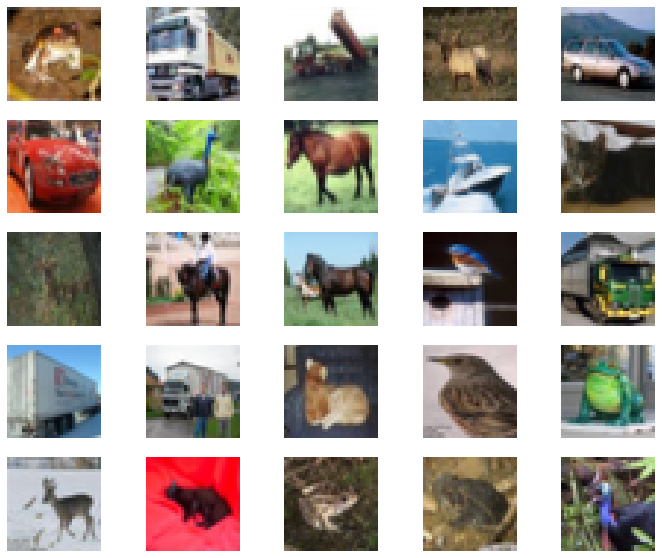

In [9]:
fig1

In [10]:
print(set(y_train.flatten()))
print(len(set(y_train.flatten())))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
10


## Prepate the data

In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [12]:
print('Train data: ', x_train.shape, y_train.shape)
print('Test data: ', x_test.shape, y_test.shape)

Train data:  (50000, 32, 32, 3) (50000,)
Test data:  (10000, 32, 32, 3) (10000,)


## Build the model

In [0]:
model = tf.keras.models.Sequential()

In [0]:
model.add( tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=x_train[0].shape) )
model.add( tf.keras.layers.BatchNormalization() )
model.add( tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add( tf.keras.layers.BatchNormalization() )
model.add( tf.keras.layers.MaxPool2D(pool_size=(2,2)))


model.add( tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add( tf.keras.layers.BatchNormalization() )
model.add( tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add( tf.keras.layers.BatchNormalization() )
model.add( tf.keras.layers.MaxPool2D(pool_size=(2,2)))


model.add( tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add( tf.keras.layers.BatchNormalization() )
model.add( tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add( tf.keras.layers.BatchNormalization() )
model.add( tf.keras.layers.MaxPool2D(pool_size=(2,2)))


model.add( tf.keras.layers.Flatten() )
model.add( tf.keras.layers.Dropout(0.2))
model.add( tf.keras.layers.Dense(1024, activation='relu'))
model.add( tf.keras.layers.Dropout(0.2))
model.add( tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        2

## Train the model

In [0]:
batch_size = 50

In [0]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

In [0]:
train_generator = data_generator.flow(x_train, y_train, batch_size)

In [0]:
steps_per_epoch = x_train.shape[0] // batch_size

In [21]:
result = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=20)

Epoch 1/15
1000/1000 [==============================] - 120s 120ms/step - loss: 1.5043 - accuracy: 0.5024 - val_loss: 1.1312 - val_accuracy: 0.6134
Epoch 2/15
1000/1000 [==============================] - 118s 118ms/step - loss: 0.9763 - accuracy: 0.6559 - val_loss: 0.8686 - val_accuracy: 0.7021
Epoch 3/15
1000/1000 [==============================] - 118s 118ms/step - loss: 0.8193 - accuracy: 0.7149 - val_loss: 0.8639 - val_accuracy: 0.7006
Epoch 4/15
1000/1000 [==============================] - 118s 118ms/step - loss: 0.7344 - accuracy: 0.7453 - val_loss: 0.8102 - val_accuracy: 0.7239
Epoch 5/15
1000/1000 [==============================] - 116s 116ms/step - loss: 0.6737 - accuracy: 0.7672 - val_loss: 0.6654 - val_accuracy: 0.7676
Epoch 6/15
1000/1000 [==============================] - 117s 117ms/step - loss: 0.6247 - accuracy: 0.7849 - val_loss: 0.7216 - val_accuracy: 0.7690
Epoch 7/15
1000/1000 [==============================] - 117s 117ms/step - loss: 0.5803 - accuracy: 0.8035 - val_

In [24]:
result = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 118s 118ms/step - loss: 0.3744 - accuracy: 0.8713 - val_loss: 0.4284 - val_accuracy: 0.8571
Epoch 2/5
1000/1000 [==============================] - 118s 118ms/step - loss: 0.3639 - accuracy: 0.8754 - val_loss: 0.5112 - val_accuracy: 0.8334
Epoch 3/5
1000/1000 [==============================] - 117s 117ms/step - loss: 0.3502 - accuracy: 0.8791 - val_loss: 0.4384 - val_accuracy: 0.8599
Epoch 4/5
1000/1000 [==============================] - 118s 118ms/step - loss: 0.3333 - accuracy: 0.8864 - val_loss: 0.4919 - val_accuracy: 0.8463
Epoch 5/5
1000/1000 [==============================] - 117s 117ms/step - loss: 0.3340 - accuracy: 0.8854 - val_loss: 0.4580 - val_accuracy: 0.8459


## Evaluate the model

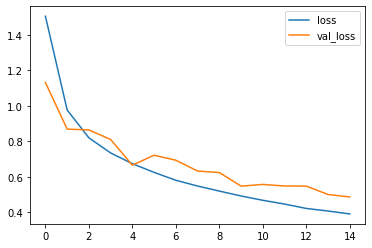

In [22]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

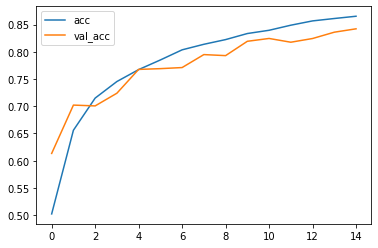

In [23]:
plt.plot(result.history['accuracy'], label='acc')
plt.plot(result.history['val_accuracy'], label='val_acc')
plt.legend()